In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
df=pd.read_csv('salary_cleaned_data.csv')

In [55]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R,spark,aws,excel,Tableau,SQL,Power_BI
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,48,1,0,0,0,1,1,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,37,1,0,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,11,1,0,1,0,1,0,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,56,1,0,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,23,1,0,0,0,1,0,1,0


In [56]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI'],
      dtype='object')

In [57]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [58]:
df['job_simp']=df['Job Title'].apply(title_simplifier)

In [59]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [60]:
df.columns
#del df['job_simplified']

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp'],
      dtype='object')

In [61]:
df['seniority']=df['Job Title'].apply(seniority)

In [62]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [63]:
df['job_state']=df.job_state.apply(lambda x: x.strip() if x.strip().lower()!= 'los angeles' else 'CA')

In [64]:
# Fix LA being displayed as State
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
WI     10
IN     10
MO      9
AZ      9
AL      8
KY      6
MI      6
GA      6
DE      6
CT      5
IA      5
NE      4
OR      4
LA      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [65]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp',
       'seniority'],
      dtype='object')

In [66]:
# Fixing jd length
df['desc_len']=df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_len, Length: 742, dtype: int64

In [67]:
df['num_comp']=df['Competitors'].apply(lambda x: len(x.split(",")) if x!=-1 else 0)

In [68]:
df['num_comp']

0      1
1      1
2      1
3      3
4      3
      ..
737    3
738    3
739    1
740    1
741    1
Name: num_comp, Length: 742, dtype: int64

In [69]:
# hourly wage to annual wage
df['min_salary']=df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary']=df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [70]:
df[df.hourly==1][['min_salary', 'max_salary', 'hourly']]

,min_salary,max_salary,hourly
165,34,48,1
177,42,68,1
197,36,50,1
202,42,68,1
210,30,50,1
246,34,48,1
271,42,68,1
337,36,50,1
345,48,78,1
357,42,68,1


In [71]:
df.company_txt

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [72]:
#df['company_txt']= df.company_txt.apply(lambda x: x.replace('\n', ""))

In [73]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R,spark,aws,excel,Tableau,SQL,Power_BI,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,0.199461,0.512129,0.045822,3910.172507,1.673854
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,0.399865,0.500190,0.209240,1533.827777,0.918451
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,1.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,1.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,3781.500000,1.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


<AxesSubplot:>

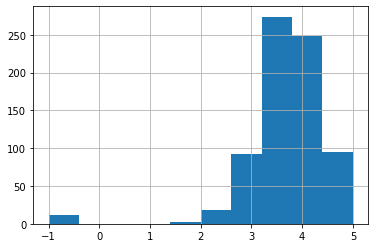

In [74]:
df.Rating.hist()

<AxesSubplot:>

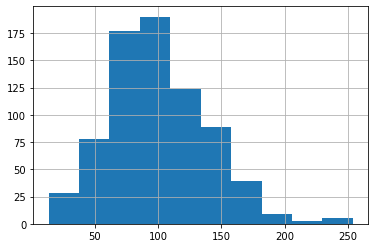

In [75]:
df.avg_salary.hist()

<AxesSubplot:>

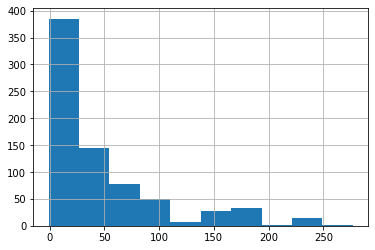

In [76]:
df.age.hist() #needs normalization

<AxesSubplot:>

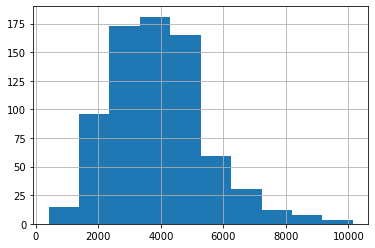

In [77]:
df.desc_len.hist()

<AxesSubplot:>

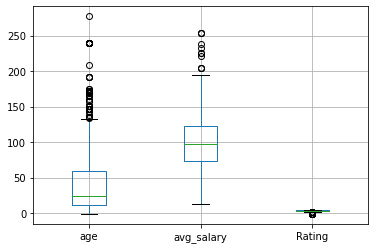

In [81]:
df.boxplot(column=['age', 'avg_salary', 'Rating'])

<AxesSubplot:>

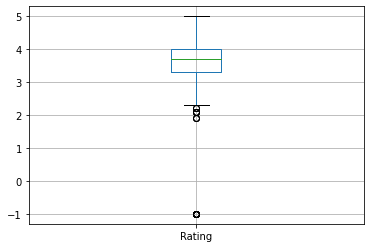

In [82]:
df.boxplot(column='Rating')

In [83]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019574,0.023162,0.165361
avg_salary,0.019574,1.000000,0.013492,0.078093
Rating,0.023162,0.013492,1.000000,-0.012631
desc_len,0.165361,0.078093,-0.012631,1.000000


<AxesSubplot:>

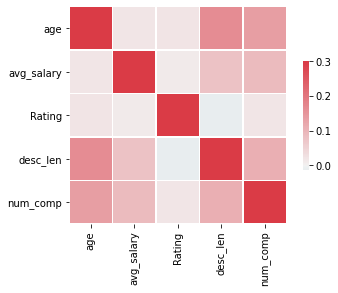

In [84]:
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [85]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [92]:
df_cat=df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp',
       'seniority']]

<AxesSubplot:>

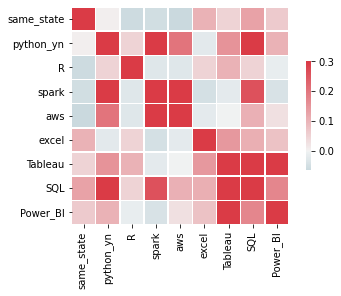

In [87]:
cmap=sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'same_state', 'python_yn', 'R','spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp','seniority']].corr(),vmax=.3, center=0, cmap=cmap,square=True, linewidths=.5, cbar_kws={"shrink": .5})


graph for Location: total= 200


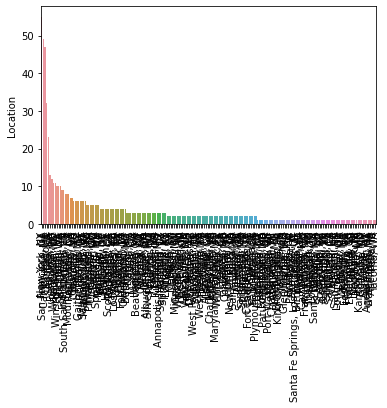

graph for Headquarters: total= 198


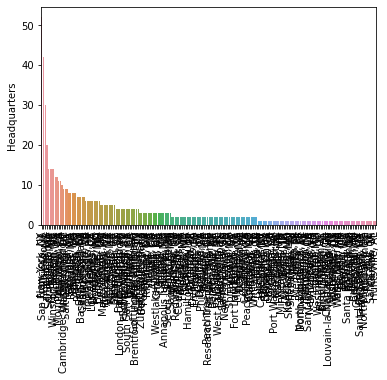

graph for Size: total= 9


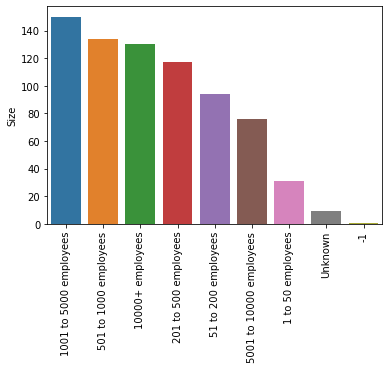

graph for Type of ownership: total= 11


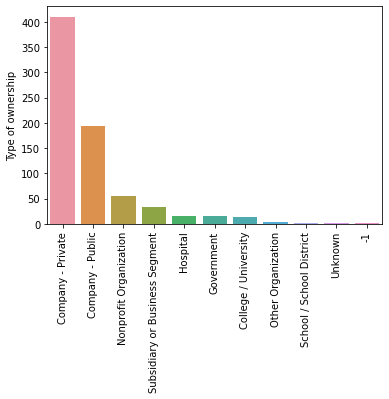

graph for Industry: total= 60


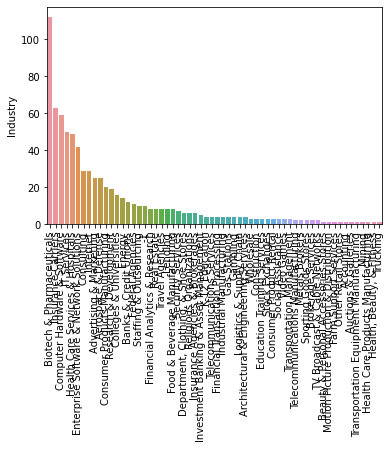

graph for Sector: total= 25


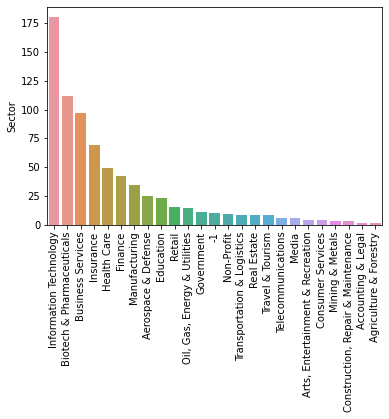

graph for Revenue: total= 14


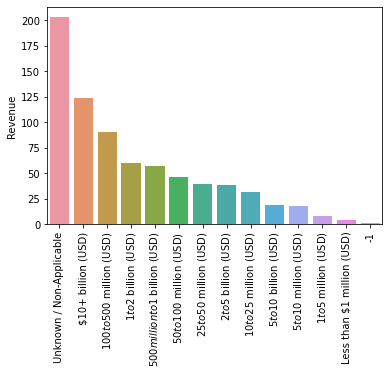

graph for company_txt: total= 343


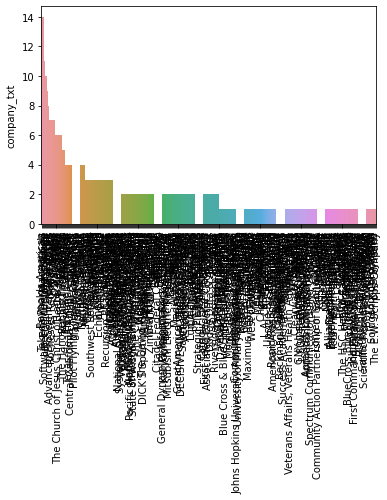

graph for job_state: total= 37


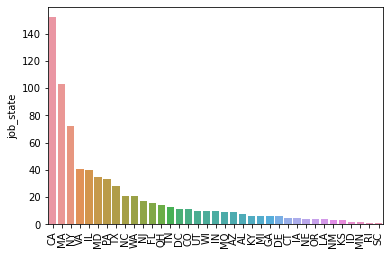

graph for same_state: total= 2


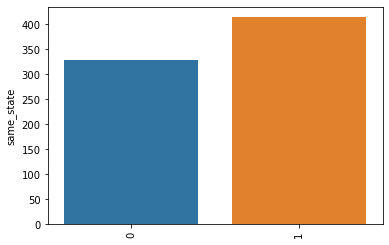

graph for python_yn: total= 2


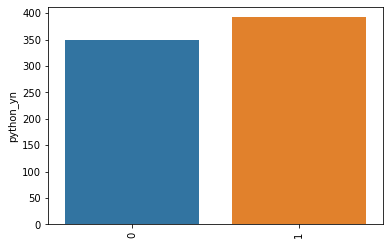

graph for R: total= 2


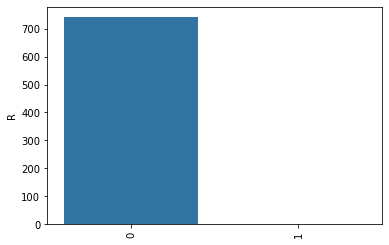

graph for spark: total= 2


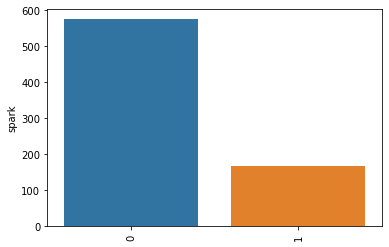

graph for aws: total= 2


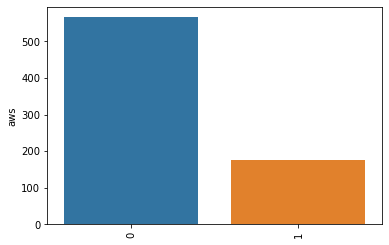

graph for excel: total= 2


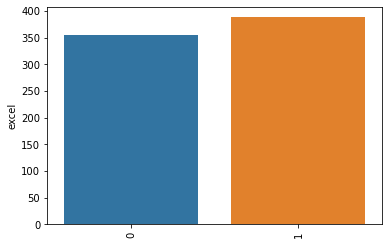

graph for Tableau: total= 2


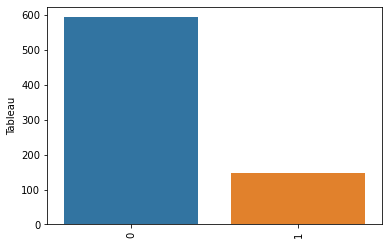

graph for SQL: total= 2


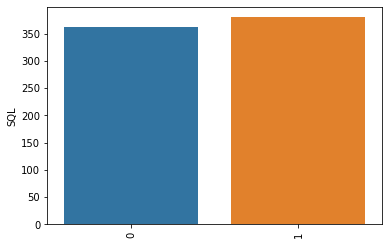

graph for Power_BI: total= 2


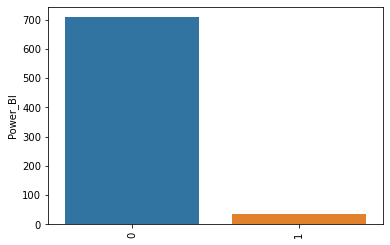

graph for job_simp: total= 7


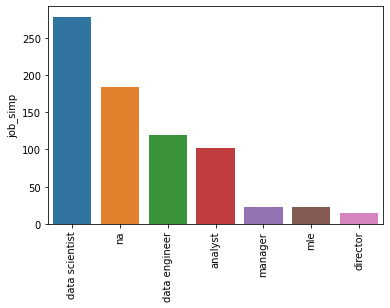

graph for seniority: total= 3


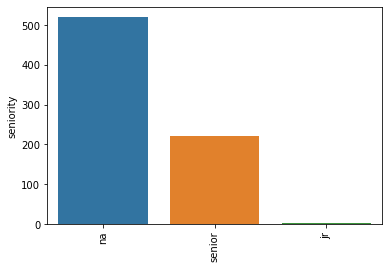

In [97]:
for i in df_cat.columns:
    cat_num=df_cat[i].value_counts()
    print("graph for %s: total= %d" %(i, len(cat_num)) )
    chart=sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [94]:
#Making it a bit clearer:


pandas.core.frame.DataFrame

graph for Location: total = 20


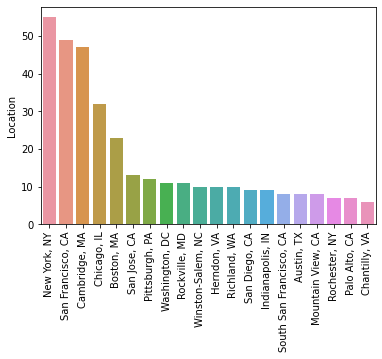

graph for Headquarters: total = 20


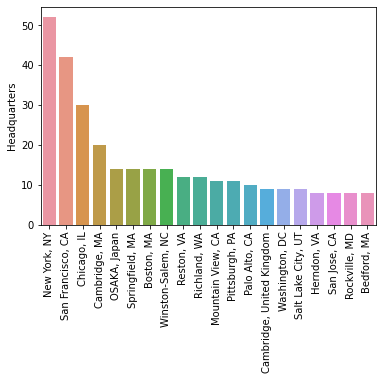

graph for company_txt: total = 20


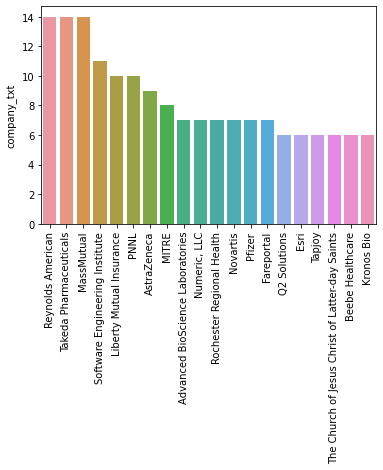

In [98]:

for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [99]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [100]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [101]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [107]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state', 'job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [108]:
pd.pivot_table(df[df.job_simp=='data scientist'], index=['job_state'], values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [109]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R',
       'spark', 'aws', 'excel', 'Tableau', 'SQL', 'Power_BI', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [111]:
df_pivots = df[['Rating', 'avg_salary','Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R', 'spark', 'aws', 'excel', 'Tableau', 'Power_BI', 'SQL' ,'Type of ownership','avg_salary']]

In [116]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [118]:
pd.pivot_table(df_pivots, index='Revenue', columns='python_yn', values='avg_salary', aggfunc='count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [128]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prava\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [123]:
!pip install nltk

In [120]:
!pip install wordcloud

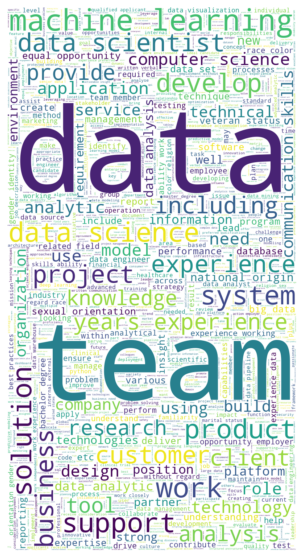

In [130]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()